In [42]:
# importing libraries to use
import pandas as pd 
from datetime import datetime
import geopy.distance
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_bikes = pd.read_csv("Trip_Data_032023.csv")

# Let's take a look at the data size we're dealing with:
print("Cyclistic's dataframe has", df_bikes.shape[0], "rows and", df_bikes.shape[1], "columns")

Cyclistic's dataframe has 258678 rows and 13 columns


In [3]:
# Taking a quick look at the first 5 rows of the dataframe:
df_bikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


In [4]:
# Checking if there is any duplicated value in the dataframe:
df_bikes.duplicated().value_counts()

False    258678
dtype: int64

In [5]:
# We can also check for the type of data that there is in each column:
# df_bikes.dtypes
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258678 entries, 0 to 258677
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             258678 non-null  object 
 1   rideable_type       258678 non-null  object 
 2   started_at          258678 non-null  object 
 3   ended_at            258678 non-null  object 
 4   start_station_name  222768 non-null  object 
 5   start_station_id    222768 non-null  object 
 6   end_station_name    220240 non-null  object 
 7   end_station_id      220240 non-null  object 
 8   start_lat           258678 non-null  float64
 9   start_lng           258678 non-null  float64
 10  end_lat             258495 non-null  float64
 11  end_lng             258495 non-null  float64
 12  member_casual       258678 non-null  object 
dtypes: float64(4), object(9)
memory usage: 25.7+ MB


In [6]:
# Columns 'started at' and 'ended at' are time data, so are not an object type, we should change that:
df_bikes['started_at'] = pd.to_datetime(df_bikes['started_at'])
df_bikes['ended_at'] = pd.to_datetime(df_bikes['ended_at'])

In [7]:
# We can now check again if it's changed or not:
df_bikes.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

The types are correct in relation to info displayed in the dataframe.

In [8]:
# We have some columns that have different types of data in it that may be worth to look at.
print("The column 'rideable_type' has", df_bikes['rideable_type'].nunique(), "different types of bikes registered, which are",
     df_bikes['rideable_type'].unique()[0], df_bikes['rideable_type'].value_counts()[0],
      df_bikes['rideable_type'].unique()[1], df_bikes['rideable_type'].value_counts()[1], "and",
       df_bikes['rideable_type'].unique()[2], df_bikes['rideable_type'].value_counts()[2] )


The column 'rideable_type' has 3 different types of bikes registered, which are electric_bike 148575 classic_bike 107083 and docked_bike 3020


In [9]:
# We can also see what types of members have been registered in this dataframe and how many for each:
print("There are", df_bikes['member_casual'].nunique(), "different types of members registered, which are",
     df_bikes['member_casual'].unique()[0], df_bikes['member_casual'].value_counts()[0], "and",
      df_bikes['member_casual'].unique()[1], df_bikes['member_casual'].value_counts()[1] )

There are 2 different types of members registered, which are member 196477 and casual 62201


In [10]:
# In percentage this is represented as:
member_percentage = (df_bikes['member_casual'].value_counts()[0]/df_bikes['member_casual'].value_counts().sum())*100
casual_percentage = (df_bikes['member_casual'].value_counts()[1]/df_bikes['member_casual'].value_counts().sum())*100
print("Percentage of Member users (%):", round(member_percentage, 3),
      "Percentage of Casual users (%):", round(casual_percentage, 3))

Percentage of Member users (%): 75.954 Percentage of Casual users (%): 24.046


From the data we can see that the majority of users are members with ~76% from the total registered and casual users with ~24%.

In [11]:
# Let's consider now the nan values that may have been registered, first we'll check if they exist in the dataframe:
df_bikes.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    35910
start_station_id      35910
end_station_name      38438
end_station_id        38438
start_lat                 0
start_lng                 0
end_lat                 183
end_lng                 183
member_casual             0
dtype: int64

In [12]:
print("As percentages, the NaN values in the current data set would be:\n",
      (df_bikes.isna().sum()/df_bikes.count())*100)

As percentages, the NaN values in the current data set would be:
 ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    16.119910
start_station_id      16.119910
end_station_name      17.452779
end_station_id        17.452779
start_lat              0.000000
start_lng              0.000000
end_lat                0.070794
end_lng                0.070794
member_casual          0.000000
dtype: float64


In [13]:
df_bikes.start_station_name.nunique()

988

We have between 0% and ~15% of NaN values in the location columns. So far we've seen that according to the company's needs we're looking to have more member users rather than casual users, so it'd be good to consider how consistent the users are, through the time data and compare member users with casual users. 

For this reason, we're going to be considering the time columns and geolocation (long, lat) and disregard the location ones, besides this, there are over 900 station names so there isn't a pattern that can be easily identified from that data.

And at the same time, regardless of the location, the user still wants to use the service for transportation, easy-to-use, money-saving and environmental reasons.

In [14]:
# Removing all NaN columns (columns with the location/stations data):
df_bikes.drop(columns=["ride_id", "start_station_name","start_station_id","end_station_name", "end_station_id"], inplace = True) 
# The ride ID is not a necessary feature in which our results may depend or vary
df_bikes.isna().sum()

rideable_type      0
started_at         0
ended_at           0
start_lat          0
start_lng          0
end_lat          183
end_lng          183
member_casual      0
dtype: int64

In [15]:
# Having few NaN values for the ending latitude and longitude, let's replace them for the mean, rather than dropping them,
# since the rest of the information is available and could be useful to check:
df_bikes["end_lat"].fillna(value=df_bikes["end_lat"].mean(), inplace = True)
df_bikes["end_lng"].fillna(value=df_bikes["end_lng"].mean(), inplace = True)
df_bikes.isna().sum() # Double checking if there is still a NaN value in any of the columns

rideable_type    0
started_at       0
ended_at         0
start_lat        0
start_lng        0
end_lat          0
end_lng          0
member_casual    0
dtype: int64

In [16]:
df_bikes.head(3)

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,41.918413,-87.636451,41.921822,-87.64414,member
1,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,41.970000,-87.710000,41.950000,-87.71000,member
2,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,41.898203,-87.637536,41.884576,-87.63189,member


We can now take a deeper look into the user's preference when it comes to the type of bike and how much time they spend using the service.

First, we're going to deal with the time length spent on each ride by the users:

In [17]:
# Calculating the time spent (ride) by the user:
df_bikes["time_length"]=df_bikes["ended_at"]-df_bikes["started_at"]
df_bikes

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,time_length
0,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,41.918413,-87.636451,41.921822,-87.644140,member,0 days 00:02:18
1,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,41.970000,-87.710000,41.950000,-87.710000,member,0 days 00:08:25
2,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,41.898203,-87.637536,41.884576,-87.631890,member,0 days 00:10:38
3,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,41.888716,-87.644448,41.910522,-87.653106,member,0 days 00:15:43
4,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,41.914480,-87.668013,41.885779,-87.651025,member,0 days 00:11:00
...,...,...,...,...,...,...,...,...,...
258673,electric_bike,2023-03-08 00:00:02,2023-03-08 00:06:25,41.890202,-87.626232,41.879255,-87.639904,member,0 days 00:06:23
258674,classic_bike,2023-03-21 14:24:42,2023-03-21 14:50:45,41.961670,-87.654640,41.958494,-87.654966,member,0 days 00:26:03
258675,electric_bike,2023-03-21 16:48:52,2023-03-21 16:51:27,41.943681,-87.648830,41.949074,-87.648636,member,0 days 00:02:35
258676,classic_bike,2023-03-16 20:36:05,2023-03-16 20:43:11,41.961670,-87.654640,41.949074,-87.648636,member,0 days 00:07:06


In [18]:
df_bikes.dtypes

rideable_type             object
started_at        datetime64[ns]
ended_at          datetime64[ns]
start_lat                float64
start_lng                float64
end_lat                  float64
end_lng                  float64
member_casual             object
time_length      timedelta64[ns]
dtype: object

In [19]:
# Analyzing what we got above:
df_bikes["time_length"].describe()

count                       258678
mean     0 days 00:13:04.803017651
std      0 days 01:38:11.450462766
min                0 days 00:00:00
25%                0 days 00:04:26
50%                0 days 00:07:30
75%                0 days 00:12:50
max               11 days 16:08:04
Name: time_length, dtype: object

We can see a maximum of 11 days and over 16 hours and a minimum of 0 hours. The mean of the time spent by users in Cyclistic is 13 minutes.

Now that we know the time length for each ride, we're going to get these values in the same unit, that is, in minutes.

In [20]:
df_bikes["time_length (min)"]=df_bikes["time_length"].dt.total_seconds()/60
# These results make all sense: ((11days*24h)+16h)*60m= ~16800 minutes

# Dropping the previous columns with no unit transformation:
df_bikes.drop(columns = ["time_length", "started_at", "ended_at"], inplace=True)

Now we're going to be dealing with the geolocation, having the starting and ending lat and long data, we're going to obtain the total distance for each ride.

#### Transforming lat and long data to traveled distance by the user.
For this, we'll be considering the geopy library since it implements the Vincenty distance which uses more accurate ellipsoidal models (such as WGS-84).


In [21]:
# Getting the points in pairs:
distance = []
for i in range(len(df_bikes["start_lat"])):
    # distance.append(geopy.distance.geodesic((x1,y1), (x2,y2))
    distance.append(geopy.distance.geodesic((df_bikes["start_lat"][i], df_bikes["start_lng"][i]), (df_bikes["end_lat"][i], df_bikes["end_lng"][i])))
    
distance[:3]

[Distance(0.7417368531814638),
 Distance(2.2214501385849053),
 Distance(1.5844156491054584)]

In [22]:
# Setting the distance list as a dataframe and assinging it as a column to the df_bikes dataframe:
df_bikes["distance (km)"] = pd.DataFrame(distance)

In [23]:
# Removing the 'km' unit word (strings) in the distance list:
df_bikes["distance (km)"] = pd.to_numeric(df_bikes["distance (km)"].astype(str).str.replace(" km", ''))
# An alternative: df['col'] = pd.to_numeric(df['col'].astype(str).str[:-1], errors='coerce')

In [ ]:
# Now that we have the distance we can drop the longitude and latitude columns:
df_bikes.drop(columns = ["start_lat", "start_lng", "end_lat", "end_lng"], inplace=True)

In [24]:
# Double checking data types to make sure that makes sense 
df_bikes.dtypes

rideable_type         object
start_lat            float64
start_lng            float64
end_lat              float64
end_lng              float64
member_casual         object
time_length (min)    float64
distance (km)        float64
dtype: object

In [25]:
# Getting basic statistics from the distance column:
print(df_bikes["distance (km)"].describe())
df_bikes

count    258678.000000
mean          1.830620
std           1.673200
min           0.000000
25%           0.807003
50%           1.356842
75%           2.345643
max          23.725628
Name: distance (km), dtype: float64


,rideable_type,start_lat,start_lng,end_lat,end_lng,member_casual,time_length (min),distance (km)
0,electric_bike,41.918413,-87.636451,41.921822,-87.644140,member,2.300000,0.741737
1,electric_bike,41.970000,-87.710000,41.950000,-87.710000,member,8.416667,2.221450
2,classic_bike,41.898203,-87.637536,41.884576,-87.631890,member,10.633333,1.584416
3,classic_bike,41.888716,-87.644448,41.910522,-87.653106,member,15.716667,2.526332
4,electric_bike,41.914480,-87.668013,41.885779,-87.651025,member,11.000000,3.485600
...,...,...,...,...,...,...,...,...
258673,electric_bike,41.890202,-87.626232,41.879255,-87.639904,member,6.383333,1.663205
258674,classic_bike,41.961670,-87.654640,41.958494,-87.654966,member,26.050000,0.353800
258675,electric_bike,41.943681,-87.648830,41.949074,-87.648636,member,2.583333,0.599241
258676,classic_bike,41.961670,-87.654640,41.949074,-87.648636,member,7.100000,1.484985


We can see that the minimum distance traveled is 0.0 km, the maximum is 23.73 km and on average, users traveled around 1.83 km. We'll be seeing now the relationship between all these features.

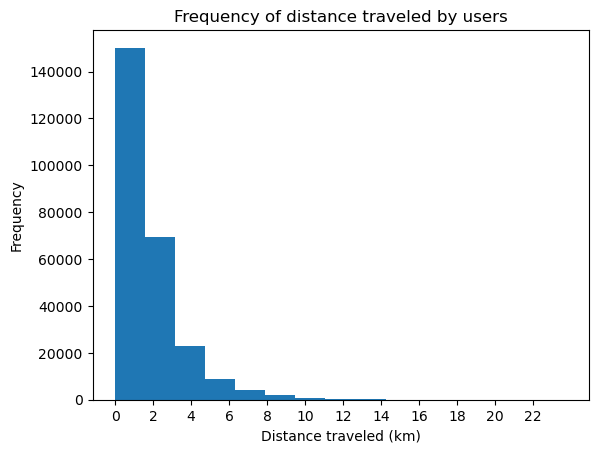

In [48]:
# Analyzing the distance feature:

plt.hist(df_bikes["distance (km)"], bins = 15)
plt.xticks(np.arange(0, 24, 2))
plt.title("Frequency of distance traveled by users")
plt.xlabel("Distance traveled (km)")
plt.ylabel("Frequency")
plt.show()

We can tell the majority of users **have a traveled distance of around 2 km**, this can be confirmed in the mean obtained ran in the previous piece of code.

Now for the other features we're going the get the histogram as well, see the behaviour and explore more graphs to analyze.

In [50]:
df_bikes.describe() # Considers all features

,start_lat,start_lng,end_lat,end_lng,time_length (min),distance (km)
count,258678.000000,258678.000000,258678.000000,258678.000000,258678.000000,258678.000000
mean,41.899031,-87.647841,41.899346,-87.648045,13.080050,1.830620
std,0.046033,0.027722,0.046118,0.027782,98.190841,1.673200
min,41.648501,-87.830000,41.630000,-87.850000,0.000000,0.000000
25%,41.879434,-87.661300,41.880000,-87.661364,4.433333,0.807003
50%,41.894668,-87.644095,41.894722,-87.644140,7.500000,1.356842
75%,41.926045,-87.630000,41.926756,-87.630000,12.833333,2.345643
max,42.070000,-87.528232,42.080000,-87.520000,16808.066667,23.725628


Let's take a look at the following plots and see what's the behaviour between features. 

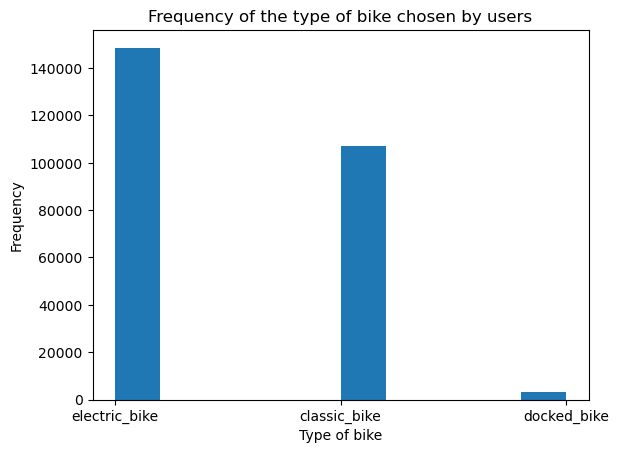

In [52]:
plt.hist(df_bikes["rideable_type"])
plt.title("Frequency of the type of bike chosen by users")
plt.xlabel("Type of bike")
plt.ylabel("Frequency")
plt.show()

In [53]:
(df_bikes["rideable_type"].value_counts()/df_bikes["rideable_type"].value_counts().sum())*100

electric_bike    57.436272
classic_bike     41.396253
docked_bike       1.167475
Name: rideable_type, dtype: float64

We can see from the data that majority of time spent (or length) in Cyclistic (~57%) comes from electric bikes, hence, we could infere that **users may prefer electric bikes over the classic bike and docked bike, as they spend more time using it.**  

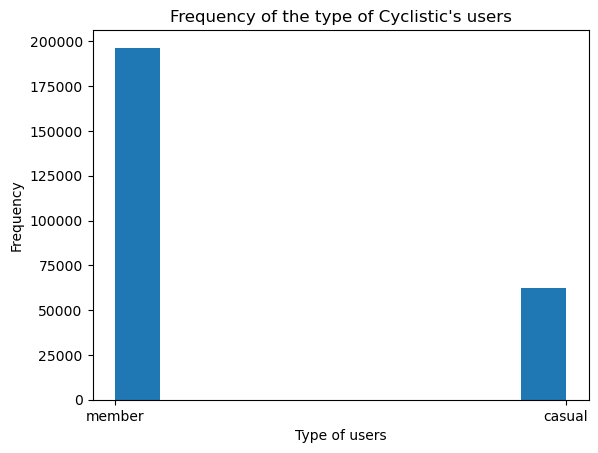

In [59]:
plt.hist(df_bikes["member_casual"])
plt.title("Frequency of the type of Cyclistic's users")
plt.xlabel("Type of users")
plt.ylabel("Frequency")
plt.show()

In [55]:
(df_bikes["member_casual"].value_counts()/df_bikes["member_casual"].value_counts().sum())*100

member    75.954275
casual    24.045725
Name: member_casual, dtype: float64

For this particular set of data available we have more members (~76%) registered than casual users (24%). We could be splitting these two types of Cyclistic's user data to obtain a comparison for both and see more clearly what we can do in Cyclistic to improve the service for the casual users to make them turn into members!

<BarContainer object of 258678 artists>

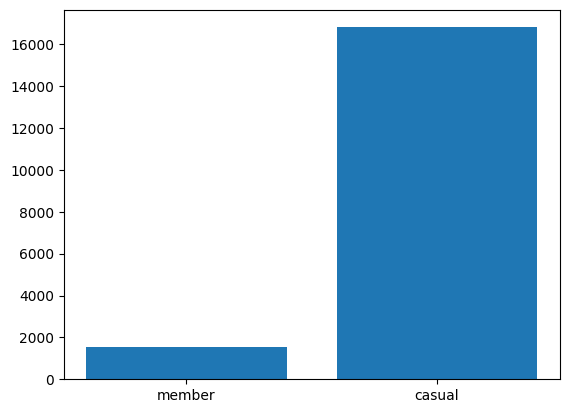

In [ ]:
plt.bar(x=df_bikes["member_casual"], height=df_bikes["time_length (min)"])

We can see from the bar plot above that **casual users tend to have larger trips**, spending more time in them.

<BarContainer object of 258678 artists>

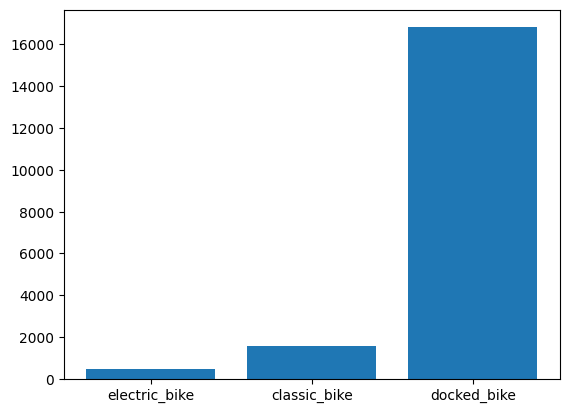

In [ ]:
plt.bar(x=df_bikes["rideable_type"], height=df_bikes["time_length (min)"])

And here we have a big difference. We can see a very strong variation among these three types of bikes, docked being the one which users tend to spend more time in their bike trips. Hence, we can say that the **electric bike can definitely be the fastest option offered by Cyclistic (and besides is sustainable!)**. 

Now let's get on to analyzing this data for member users and casual users separately so we find more clues as to what to suggest in our business task.

In [56]:
# Setting data frames for both user types:
df_member = df_bikes[df_bikes["member_casual"]=="member"]
df_casual = df_bikes[df_bikes["member_casual"]=="casual"]

In [60]:
df_member.head(3)

,rideable_type,start_lat,start_lng,end_lat,end_lng,member_casual,time_length (min),distance (km)
0,electric_bike,41.918413,-87.636451,41.921822,-87.64414,member,2.300000,0.741737
1,electric_bike,41.970000,-87.710000,41.950000,-87.71000,member,8.416667,2.221450
2,classic_bike,41.898203,-87.637536,41.884576,-87.63189,member,10.633333,1.584416


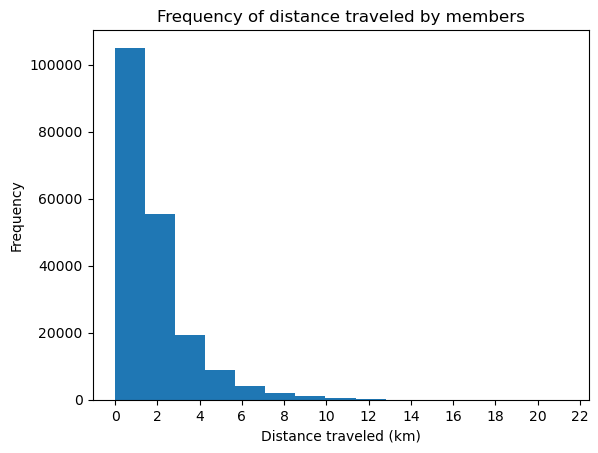

In [61]:
# Analyzing the distance feature for members:

plt.hist(df_member["distance (km)"], bins = 15)
plt.xticks(np.arange(0, 24, 2))
plt.title("Frequency of distance traveled by members")
plt.xlabel("Distance traveled (km)")
plt.ylabel("Frequency")
plt.show()

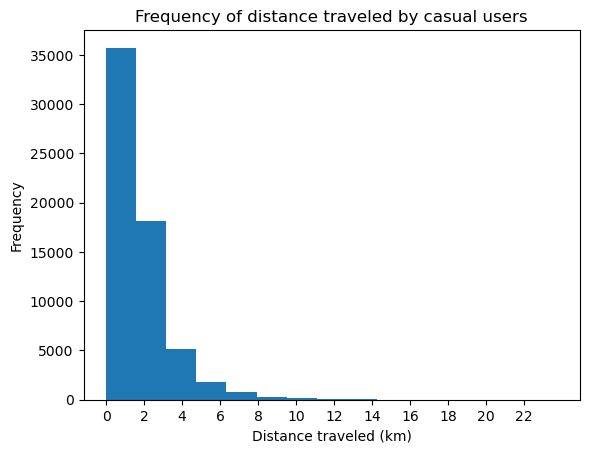

In [64]:
# Analyzing distance feature for casual:

plt.hist(df_casual["distance (km)"], bins = 15)
plt.xticks(np.arange(0, 24, 2))
plt.title("Frequency of distance traveled by casual users")
plt.xlabel("Distance traveled (km)")
plt.ylabel("Frequency")
plt.show()

So from here, we can tell that **both types of users use the service for trips of around 2 km.**

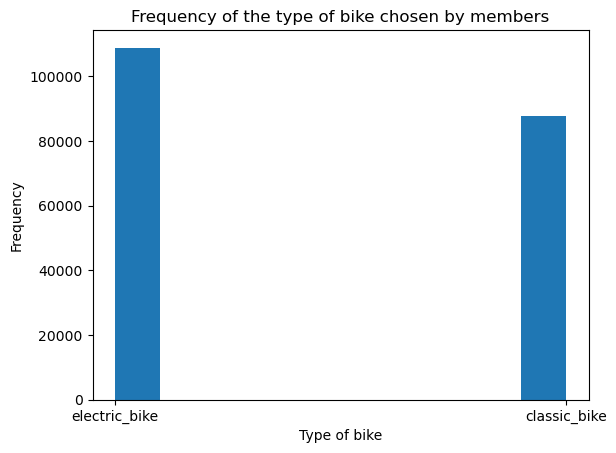

In [65]:
# Analyzing bike preference for members: 

plt.hist(df_member["rideable_type"])
plt.title("Frequency of the type of bike chosen by members")
plt.xlabel("Type of bike")
plt.ylabel("Frequency")
plt.show()

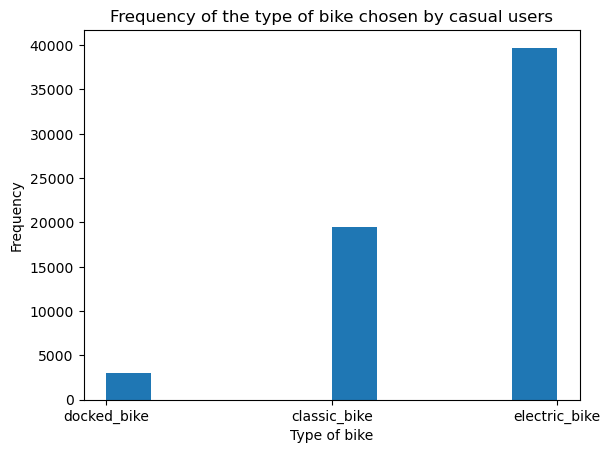

In [66]:
# Analyzing bike preference for casual users: 

plt.hist(df_casual["rideable_type"])
plt.title("Frequency of the type of bike chosen by casual users")
plt.xlabel("Type of bike")
plt.ylabel("Frequency")
plt.show()

In this case, **none of the members use docked bike**, those few come from casual users. And for both, they prefer electric bike as well. Classic bike is the next preferred.

Let's see now the amount of time both take in their trips.

In [68]:
# Member's trip time:
plt.bar(x=df_member["member_casual"], height=df_member["time_length (min)"])

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000266E5278B80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Casual's trip time:
plt.bar(x=df_casual["member_casual"], height=df_casual["time_length (min)"])

Recall that we have categorical values, that is, columns that have classifications as object type (rideable_type, member_casual).
For these type of columns we may want to use One Hot Encoding or dummies.